In [1]:
# Enable Pylab
%pylab inline

/Users/seanbarnes/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import pandas, statsmodels, and Seaborn
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import seaborn as sns

In [13]:
# File path - Update as needed
fpath = '/Users/seanbarnes/Dropbox/Teaching/Workshops/Python/Medicare_Provider_Charge_Outpatient_APC30_CY2011.csv'

In [15]:
# Preview file - Update file directory as needed
!head -n 10 $fpath

In [17]:
# Import data file - Update file directory as needed
df = pd.read_csv(fpath)
df.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.913043
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589537,36.623742
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541643
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.750000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.590909


In [67]:
# Summarize services provided - Sorted by frequency by default
df['APC'].2

0267 - Level III Diagnostic and Screening Ultrasound                                     2998
0269 - Level II Echocardiogram Without Contrast                                          2898
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    2855
0265 - Level I Diagnostic and Screening Ultrasound                                       2739
0377 - Level II Cardiac Imaging                                                          2564
0078 - Level III Pulmonary Treatment                                                     2304
0368 - Level II Pulmonary Tests                                                          2248
0605 - Level 2 Hospital Clinic Visits                                                    2116
0207 - Level III Nerve Injections                                                        2002
0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies                          1967
0096 - Level II Noninvasive Physiologic Studies             

In [22]:
# Alternate approach to summarize services provided - Sorted by index by default
df.groupby('APC')['Outpatient Services'].count()

APC
0012 - Level I Debridement & Destruction                                                  291
0013 - Level II Debridement & Destruction                                                1479
0015 - Level III Debridement & Destruction                                               1534
0019 - Level I Excision/ Biopsy                                                           445
0020 - Level II Excision/ Biopsy                                                         1060
0073 - Level III Endoscopy Upper Airway                                                    95
0074 - Level IV Endoscopy Upper Airway                                                    411
0078 - Level III Pulmonary Treatment                                                     2304
0096 - Level II Noninvasive Physiologic Studies                                          1889
0203 - Level IV Nerve Injections                                                          131
0204 - Level I Nerve Injections                         

In [27]:
# Filter data set to individual state records
state = 'NY'
df[df['Provider State'] == state].head(10)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
167,0012 - Level I Debridement & Destruction,330005,KALEIDA HEALTH,"726 EXCHANGE STREET, SUITE 522",BUFFALO,NY,14210,NY - Buffalo,93,102.118280,29.053763
168,0012 - Level I Debridement & Destruction,330029,SHEEHAN MEMORIAL HOSPITAL,425 MICHIGAN AVENUE,BUFFALO,NY,14203,NY - Buffalo,11,74.545455,26.363636
169,0012 - Level I Debridement & Destruction,330058,GENEVA GENERAL HOSPITAL,196 -198 NORTH STREET,GENEVA,NY,14456,NY - Rochester,1802,23.846282,13.714206
170,0012 - Level I Debridement & Destruction,330090,ARNOT OGDEN MEDICAL CENTER,600 ROE AVENUE,ELMIRA,NY,14905,NY - Elmira,13,114.076923,15.230769
171,0012 - Level I Debridement & Destruction,330125,ROCHESTER GENERAL HOSPITAL,1425 PORTLAND AVENUE,ROCHESTER,NY,14621,NY - Rochester,426,49.046948,13.739437
172,0012 - Level I Debridement & Destruction,330136,MARY IMOGENE BASSETT HOSPITAL,ONE ATWELL ROAD,COOPERSTOWN,NY,13326,NY - Albany,1012,21.618577,16.593874
173,0012 - Level I Debridement & Destruction,330157,SAMARITAN MEDICAL CENTER,830 WASHINGTON STREET,WATERTOWN,NY,13601,NY - Syracuse,803,62.789539,15.953923
174,0012 - Level I Debridement & Destruction,330169,BETH ISRAEL MEDICAL CENTER,FIRST AVENUE AT 16TH STREET,NEW YORK,NY,10003,NY - Manhattan,189,43.000000,17.693122
175,0012 - Level I Debridement & Destruction,330211,CLAXTON-HEPBURN MEDICAL CENTER,214 KING STREET,OGDENSBURG,NY,13669,NY - Syracuse,1955,72.434783,14.167775
176,0012 - Level I Debridement & Destruction,330214,NYU HOSPITALS CENTER,550 FIRST AVENUE,NEW YORK,NY,10016,NY - Manhattan,31,58.258065,21.677419


In [58]:
# Describe distribution of outpatient services, submitted charges, and total payments
summary = df[['Outpatient Services', 'Average Estimated Submitted Charges', 'Average Total Payments']].describe()
summary

,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
count,41175.000000,41175.000000,41175.000000
mean,517.684396,1544.524217,276.822128
std,2865.860424,1859.762140,263.325565
min,11.000000,12.625000,7.312500
25%,41.000000,320.041632,89.105525
50%,124.000000,791.764706,147.224138
75%,331.000000,2196.662971,410.458811
max,155708.000000,32105.636360,2062.468421


In [31]:
# Pivot table - Output to file by adding .to_csv('filename.csv', index=True) to end of line
df.pivot_table(values = 'Average Total Payments', index = 'APC', columns = 'Provider State', aggfunc = mean).applymap(lambda s: '%.2f' %s)

Provider State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
APC,,,,,,,,,,,,,,,,,,,,,
0012 - Level I Debridement & Destruction,36.62,21.91,18.55,18.29,21.01,17.81,20.87,15.40,nan,16.39,...,19.20,18.22,15.09,15.19,14.58,16.61,17.49,16.60,13.35,nan
0013 - Level II Debridement & Destruction,72.66,47.07,52.43,58.02,64.19,60.12,61.41,59.70,58.01,53.86,...,62.66,50.20,54.83,55.91,56.39,61.01,59.60,59.52,46.73,45.96
0015 - Level III Debridement & Destruction,119.17,87.04,88.94,103.31,114.81,101.92,111.53,105.12,103.19,95.26,...,106.75,88.27,94.40,95.32,94.36,105.10,103.50,100.30,88.46,102.48
0019 - Level I Excision/ Biopsy,nan,310.36,309.45,328.55,416.01,348.77,384.99,362.29,355.41,324.66,...,326.05,320.04,311.38,307.45,307.08,351.05,355.90,328.82,304.48,nan
0020 - Level II Excision/ Biopsy,nan,493.89,536.68,578.39,676.86,563.89,662.43,604.64,600.47,544.19,...,531.74,516.55,545.31,546.66,549.81,594.33,611.97,558.95,506.06,nan
0073 - Level III Endoscopy Upper Airway,335.91,nan,251.40,317.45,344.40,299.57,nan,292.50,nan,276.94,...,nan,279.02,264.01,271.34,277.00,319.45,309.13,289.06,nan,nan
0074 - Level IV Endoscopy Upper Airway,nan,1340.17,1314.37,1416.64,1692.30,1437.48,1681.80,1535.50,1541.91,1421.74,...,1442.78,1371.78,1414.02,1364.58,1412.08,1642.61,1537.20,1430.58,1284.56,nan
0078 - Level III Pulmonary Treatment,115.30,88.12,90.01,100.71,116.98,99.90,113.60,101.56,99.53,94.15,...,103.78,89.55,93.21,93.72,93.20,101.59,103.65,96.84,86.04,103.03
0096 - Level II Noninvasive Physiologic Studies,120.04,94.84,96.93,104.77,122.62,108.76,119.33,109.23,108.97,102.24,...,109.83,96.78,99.81,99.00,101.22,113.72,111.83,104.67,91.80,106.41


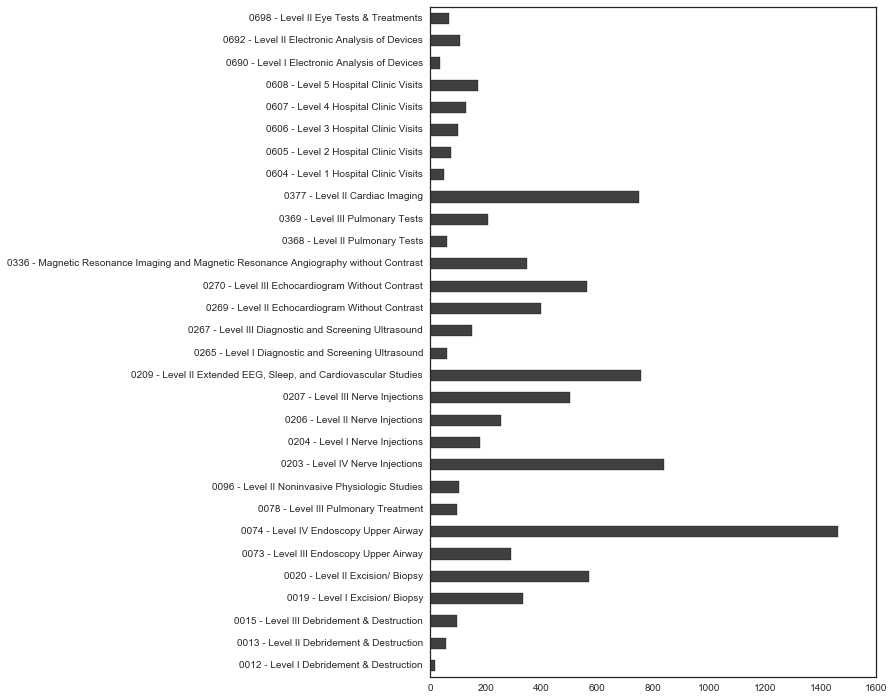

In [54]:
# Bar chart of mean average estimated submitted charges or mean average total payments
sns.set_style('white')
data = 'Average Total Payments' # 'Average Total Payments' or 'Average Estimated Submitted Charges'
df.groupby('APC')[data].mean().plot(kind='barh', color='0.25', figsize=(8,12))
plt.ylabel('')

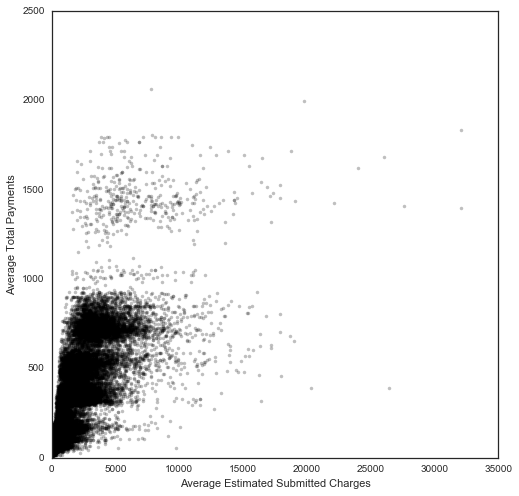

In [48]:
# Scatter plot of average estimated submitted charges vs. average total payments
sns.set_style('white')
plt.figure(figsize=(8,8))
plt.plot(df['Average Estimated Submitted Charges'], df['Average Total Payments'], 'k.', alpha=0.25)
plt.xlabel('Average Estimated Submitted Charges')
plt.ylabel('Average Total Payments')

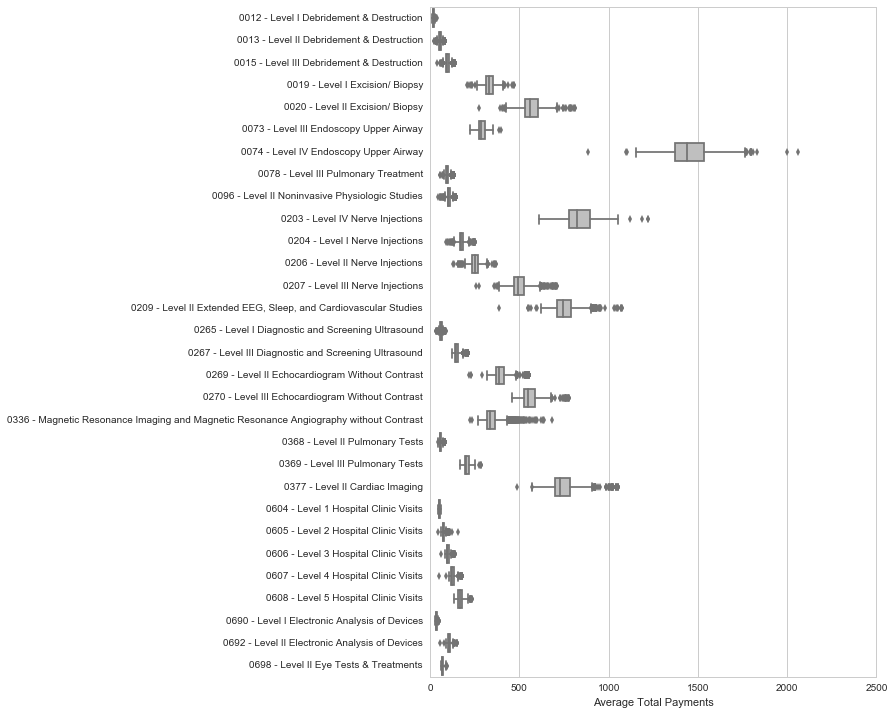

In [49]:
# Box plots of average estimated submitted charges or average total payments
sns.set_style('whitegrid')
data = 'Average Total Payments' # 'Average Total Payments' or 'Average Estimated Submitted Charges'
plt.figure(figsize=(8,12))
sns.boxplot(x=data, y='APC', data=df, color='0.75')
plt.ylabel('')

In [69]:
# Print sorted list of APCs
apcs = df['APC'].value_counts().sort_index().reset_index()
apcs

,index,APC
0,0012 - Level I Debridement & Destruction,291
1,0013 - Level II Debridement & Destruction,1479
2,0015 - Level III Debridement & Destruction,1534
3,0019 - Level I Excision/ Biopsy,445
4,0020 - Level II Excision/ Biopsy,1060
5,0073 - Level III Endoscopy Upper Airway,95
6,0074 - Level IV Endoscopy Upper Airway,411
7,0078 - Level III Pulmonary Treatment,2304
8,0096 - Level II Noninvasive Physiologic Studies,1889
9,0203 - Level IV Nerve Injections,131


In [75]:
# Compute confidence interval for Average Estimated Submitted Charges for specific APC
alpha = 0.05 # 100(1-alpha)% confidence
apc = apcs.ix[12,'index']
charges = sm.stats.DescrStatsW(df['Average Estimated Submitted Charges'][df['APC'] == apc])
charges.tconfint_mean(alpha)

(2497.0471164023515, 2657.5987311741715)

In [76]:
# Compute confidence interval for Average Total Payments for specific APC
alpha = 0.05 # 100(1-alpha)% confidence
apc = apcs.ix[12,'index']
payments = sm.stats.DescrStatsW(df['Average Total Payments'][df['APC'] == apc])
payments.tconfint_mean(alpha)

(499.86653368553493, 504.37903283794139)

In [82]:
# Conduct one-sample t-test for Average Estimated Submitted Charges for specific APC
apc = apcs.ix[12,'index']
h0 = 2500
charges = sm.stats.DescrStatsW(df['Average Estimated Submitted Charges'][df['APC'] == apc])
charges.ttest_mean(value=h0, alternative='larger') # alternative: 'two-sided', 'larger', 'smaller'

(1.889010835424026, 0.029517430451759634, 2001.0)

In [84]:
# Conduct one-sample t-test for Average Total Payments for specific APC
apc = apcs.ix[12,'index']
h0 = 500
payments = sm.stats.DescrStatsW(df['Average Total Payments'][df['APC'] == apc])
payments.ttest_mean(value=h0, alternative='two-sided') # alternative: 'two-sided', 'larger', 'smaller'

(1.8451402413426123, 0.065164817227168881, 2001.0)

In [79]:
# Perform two-sample t-test between Average Estimated Submitted Charges and Average Total Payments for specific APC
apc = apcs.ix[12,'index']
charges = sm.stats.DescrStatsW(df['Average Estimated Submitted Charges'][df['APC'] == apc])
payments = sm.stats.DescrStatsW(df['Average Total Payments'][df['APC'] == apc])
sm.stats.ttest_ind(df['Average Estimated Submitted Charges'], df['Average Total Payments'], alternative='larger') # alternative: 'two-sided', 'larger', 'smaller'

(136.95134484572986, 0.0, 82348.0)

In [113]:
# Perform one-way ANOVA for Average Estimated Submitted Charges and Average Total Payments for specific class of APC
data = 'Average Estimated Submitted Charges'
apc_class = apcs.ix[22:26,'index']
arrs = []
for i, apc in enumerate(apc_class):
    arrs.append(df[data][df.APC == apc].values)
eval('ss.f_oneway(' + ','.join(['arrs['+str(i)+']' for i in range(len(arrs))]) + ')')

F_onewayResult(statistic=396.90769460089109, pvalue=1.2461819619735984e-304)

In [135]:
# Create simple regression model for payments as a function of charges
y = df['Average Total Payments'].values
X1 = df['Average Estimated Submitted Charges'].values
X1 = sm.add_constant(X1)
model1 = sm.OLS(y,X1)
results1 = model1.fit()
print results1.summary(xname=['Constant', 'Average Charges'], yname='Average Payments')

                            OLS Regression Results                            
Dep. Variable:       Average Payments   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 5.666e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:43:17   Log-Likelihood:            -2.7009e+05
No. Observations:               41175   AIC:                         5.402e+05
Df Residuals:                   41173   BIC:                         5.402e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Constant          110.3948      1.094    1

In [142]:
# Create multiple regression model for payments as a function of services, charges, and APC codes
y = df['Average Total Payments'].values
X2 = df[['Outpatient Services', 'Average Estimated Submitted Charges']].values
apc_dummies = pd.get_dummies(df['APC']).values
apc_cols = list(df['APC'].str.split(' - ').str.get(0).unique()) # APC Codes only, for brevity
X2 = np.concatenate([X2, apc_dummies[:,1:]], axis=1) # Leave out first APC code - 0012
X2 = sm.add_constant(X2)
model2 = sm.OLS(y,X2)
results2 = model2.fit()
print results2.summary(xname=['Constant', 'Outpatient Services', 'Average Charges'] + apc_cols[1:], yname='Average Payments')

                            OLS Regression Results                            
Dep. Variable:       Average Payments   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 6.496e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        14:46:37   Log-Likelihood:            -2.0739e+05
No. Observations:               41175   AIC:                         4.148e+05
Df Residuals:                   41143   BIC:                         4.151e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Constant               17.2271    